In [1]:
import pandas as pd
import numpy as np
import hddm
import sys
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
pd.options.display.max_columns = None


Bad key "text.kerning_factor" on line 4 in
/Users/afengler/opt/miniconda3/envs/hddm_py3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution
/Users/afengler/opt/miniconda3/envs/hddm_py3/lib/python3.6/site-packages/IPython/parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated since IPython 4.0. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


In [2]:
#generate data
data, params = hddm.generate.gen_rand_data(params={'a': 2, 't': .4, 'v': .5},
                                                   size = 500)

In [3]:
#create column called nn_response with choice coded as -1 (lower bound) and 1 (upper bound)
data['nn_response'] = np.where(data.response==0, -1,data.response)
data.head(10)

,rt,response,subj_idx,condition,nn_response
0,1.731,1.0,0,none,1.0
1,1.168,1.0,0,none,1.0
2,0.953,1.0,0,none,1.0
3,2.999,1.0,0,none,1.0
4,1.533,1.0,0,none,1.0
5,1.186,0.0,0,none,-1.0
6,0.832,1.0,0,none,1.0
7,1.173,1.0,0,none,1.0
8,1.486,1.0,0,none,1.0
9,0.961,1.0,0,none,1.0


In [4]:
#run nn_likelihood
m = hddm.HDDMnn(data,include='z')
m.sample(400,burn = 200)
m.print_stats()

 [-----------------100%-----------------] 401 of 400 complete in 237.6 secCould not generate output statistics for t
Could not generate output statistics for z_trans
Could not generate output statistics for v
Could not generate output statistics for a
Could not generate output statistics for z


TypeError: 'NoneType' object is not subscriptable

In [158]:
samples = m.get_traces()

In [138]:
x = samples.describe()

In [145]:
type(samples)

pandas.core.frame.DataFrame

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1fbe5710>,
      dtype=object)

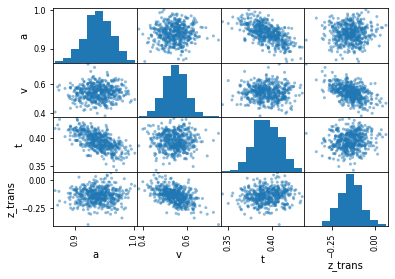

In [159]:
pd.plotting.scatter_matrix(samples)

In [154]:
#plt.hist(samples['t'])


In [153]:
#plt.hist(samples['a'])

In [152]:
#plt.hist(samples['v'])

In [160]:
#compare to normal HDDM
m2 = hddm.HDDM(data,include='all')
m2.sample(1000,burn = 500)
m2.print_stats()

 [-----------------100%-----------------] 1000 of 1000 complete in 106.8 secCould not generate output statistics for v
Could not generate output statistics for sz
Could not generate output statistics for z
Could not generate output statistics for z_trans
Could not generate output statistics for t
Could not generate output statistics for a
Could not generate output statistics for sv
Could not generate output statistics for p_outlier
Could not generate output statistics for st


TypeError: 'NoneType' object is not subscriptable

In [161]:
samples2 = m2.get_traces()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1f98dc18>,
      dtype=object)

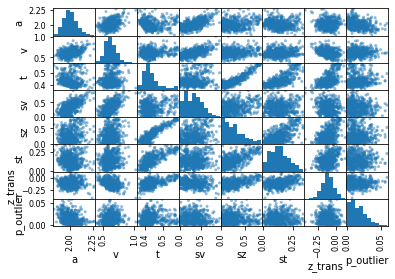

In [162]:
pd.plotting.scatter_matrix(samples2)

In [128]:
import numpy as np
from math import *

def multivariate_t_distribution(x,mu,Sigma,df,d):
    '''
    Multivariate t-student density:
    output:
        the density of the given element
    input:
        x = parameter (d dimensional numpy array or scalar)
        mu = mean (d dimensional numpy array or scalar)
        Sigma = scale matrix (dxd numpy array)
        df = degrees of freedom
        d: dimension
    '''
    Num = gamma(1. * (d + df)/2)
    #print(np.dot(np.dot((x - mu), np.linalg.inv(Sigma)).T, (x - mu)))
    #print(gamma(1. * (df / 2)) * np.power(df * pi,1. * (d / 2)) * np.power(np.linalg.det(Sigma), 1. / 2) * np.power(1 + (1./df) * np.dot(np.dot((x - mu), np.linalg.inv(Sigma)), (x - mu)), 1. * (d + df) / 2))
    Denom = ( gamma(1. * (df / 2)) * np.power(df * pi,1. * (d / 2)) * np.power(np.linalg.det(Sigma), 1. / 2) * np.power(1 + (1./df) * np.dot(np.dot((x - mu),np.linalg.inv(Sigma)), (x - mu).T), 1. * (d + df) / 2))
    
    
    d = np.divide(1. * Num, Denom)
    return d

In [129]:
#written by Enzo Michelangeli, style changes by josef-pktd
# Student's T random variable
def multivariate_t_rvs(m, S, df = np.inf, n=1):
    '''generate random variables of multivariate t distribution
    Parameters
    ----------
    m : array_like
        mean of random variable, length determines dimension of random variable
    S : array_like
        square array of covariance  matrix
    df : int or float
        degrees of freedom
    n : int
        number of observations, return random array will be (n, len(m))
    Returns
    -------
    rvs : ndarray, (n, len(m))
        each row is an independent draw of a multivariate t distributed
        random variable
    '''
    m = np.asarray(m)
    d = len(m)
    if df == np.inf:
        x = 1.
    else:
        x = np.random.chisquare(df, n) / df
    z = np.random.multivariate_normal(np.zeros(d),S,(n,))
    return m + z/np.sqrt(x)[:,None]   # same output format as random.multivariate_normal

In [130]:
S = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
m = np.array([1, 2, 3])
X = multivariate_t_rvs(m = m, S = S, df = 1, n = 1000)

In [132]:
out = multivariate_t_distribution(X[:,:], m, S, df = 1, d = 3)

In [127]:
(np.dot((X - m), np.linalg.inv(S))).shape #,  (X - m))

(1000, 3)